## 2nd Project (from 1994 Census bureau database)

## Group 3

## Business Question
To determine whether a person makes over US$ 50K a year.

Assessing whether an individual with certain attributes (age, education, sex, marital status and others) will earn
higher or lower income levels. A higher income level is defined as an income level of greater than $50k.

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [179]:
df = pd.read_csv('adult.data', header = None)

In [180]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [181]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'nation_country', 'income']

As there is no clear explaination of what are considered in the feature fnlwgt(final weight),therefore we are going to drop it. 

In [176]:
df = df.drop(columns=['fnlwgt'])
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nation_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
nation_country    32561 non-null object
income            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


The dataset consists a mixture of categorical and numerical features.

In [118]:
df.shape

(32561, 14)

In [119]:
df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

Change the income column to binary for predicting purpose: 0 : <=50k, 1: >50k

# EDA

### Univariate analysis
Analysis of variables.

In [120]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income_bi
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


We would try to look into each individual feature first.

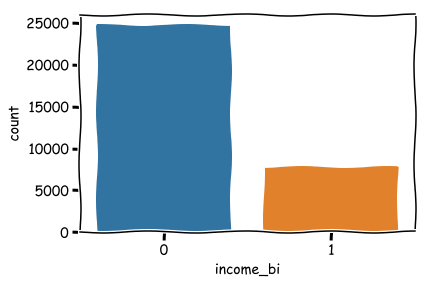

In [121]:
plt.xkcd()
df.income.value_counts()
sns.countplot(x="income_bi", data=df)

We have about 25% people with the salary is greater than 50K/year.

In [122]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [123]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

There are a significant amount of missing values in workclass category. 

In [124]:
df.nation_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Missing values in the nation_country category as well.

In [125]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Significant amount of missing values in the occupation category as well.

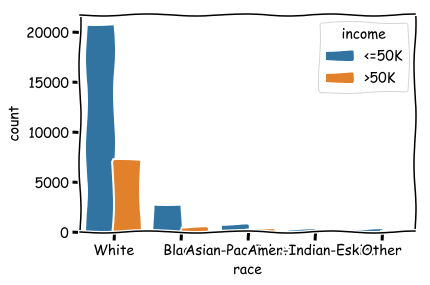

In [126]:
sns.countplot(x="race", data=df, hue="income")

In [127]:
df.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

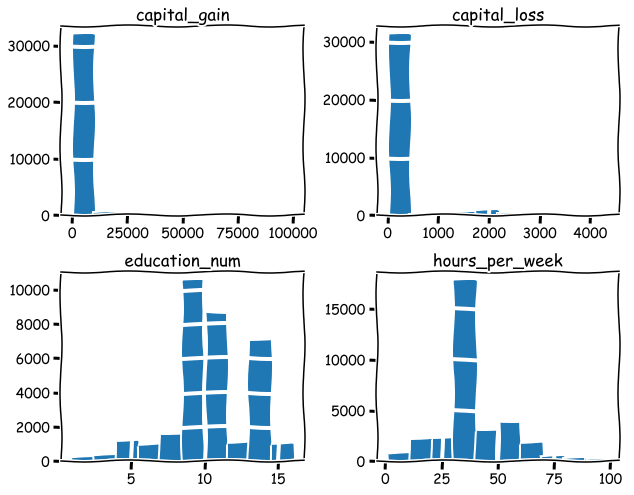

In [130]:
df[['capital_gain', 'capital_loss', 'hours_per_week', 'education_num']].hist(figsize=(10,8))
plt.show()

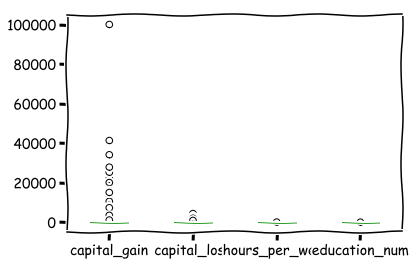

In [131]:
df[['capital_gain','capital_loss', 'hours_per_week', 'education_num']].boxplot()

We can combine capital_gain and capital_loss into one column.

In [132]:
df['capital_loss'] = df['capital_loss']*(-1)
df['capital'] = df['capital_gain'] + df['capital_loss']
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,nation_country,income,income_bi,capital
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2174
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,14084
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1,5178


We are going to remove the rows that contain the invalid value/missing values '?', as well as getting rid of few existing columns.

In [133]:
df = df.drop(['income','capital_gain','capital_loss','nation_country','education', 'race'], axis=1)

In [134]:
df = df[(df.astype(str) != '?').all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 10 columns):
age               30718 non-null int64
workclass         30718 non-null object
education_num     30718 non-null int64
marital_status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
sex               30718 non-null object
hours_per_week    30718 non-null int64
income_bi         30718 non-null int64
capital           30718 non-null int64
dtypes: int64(5), object(5)
memory usage: 2.6+ MB


### Bivariate Analysis

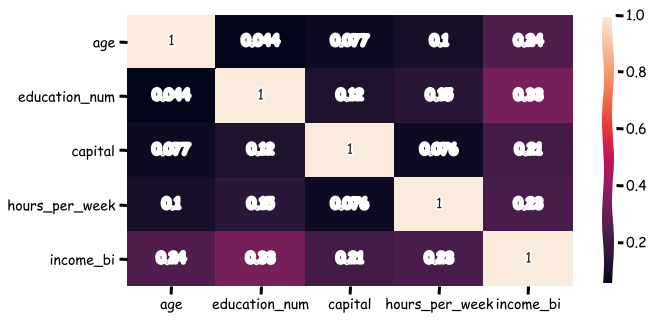

In [135]:
plt.subplots(figsize = (10,5))
correlation_matrix = df[['age', 'education_num', 'capital', 'hours_per_week', 'income_bi']].corr()
sns.heatmap(correlation_matrix, annot = True)

Education has the highest correlation with income relatively.
Income is positively correlated with age, years of education, capital and hours of work.
We can also see the variables are positively correlated with each other (slightly).

### Preprocessing

Use get_dummies on categorical columns 

In [136]:
col = ['workclass', 'marital_status', 'occupation', 'relationship', 'sex']

In [137]:
df_dummy=pd.get_dummies(df[col],drop_first=True)

In [138]:
df_drop = df.drop(columns=col)

In [140]:
df1.isna().any()

age                                     False
education_num                           False
hours_per_week                          False
income_bi                               False
capital                                 False
workclass_Local-gov                     False
workclass_Private                       False
workclass_Self-emp-inc                  False
workclass_Self-emp-not-inc              False
workclass_State-gov                     False
workclass_Without-pay                   False
marital_status_Married-AF-spouse        False
marital_status_Married-civ-spouse       False
marital_status_Married-spouse-absent    False
marital_status_Never-married            False
marital_status_Separated                False
marital_status_Widowed                  False
occupation_Armed-Forces                 False
occupation_Craft-repair                 False
occupation_Exec-managerial              False
occupation_Farming-fishing              False
occupation_Handlers-cleaners      

In [139]:
df1 = pd.concat([df_drop,df_dummy],axis=1)

Separating out the target data

In [141]:
X=df1.drop('income_bi',axis=1)
y = df1['income_bi']
X.head()

,age,education_num,hours_per_week,capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male
0,39,13,40,2174,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,28,13,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [142]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_bi, dtype: int64

Split the data into training and testing ; test size data is 0.2

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

### Model
A supervised machine learning approach of Decision Tree and Random Forest classifier, as well as kNN (classification algorithms) would be used since the outcome variable is binary variables. Regression algorithms will perfrom less due to less variation in the target variables.

In [145]:
print(y_test[0:3])

17517    0
5762     0
4004     1
Name: income_bi, dtype: int64


In [146]:
print(y_train[0:3])

8574     0
23766    0
12096    0
Name: income_bi, dtype: int64


In [147]:
print(X_train[0:3])

       age  education_num  hours_per_week  capital  workclass_Local-gov  \
8574    28             13              40        0                    0   
23766   18              9              20        0                    0   
12096   49              4              40        0                    0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
8574                   0                       0                           0   
23766                  1                       0                           0   
12096                  1                       0                           0   

       workclass_State-gov  workclass_Without-pay  ...  \
8574                     0                      0  ...   
23766                    0                      0  ...   
12096                    0                      0  ...   

       occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
8574                            0                 0              

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#### Decision Tree

In [149]:
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [150]:
dtreemodel.classes_

array([0, 1], dtype=int64)

In [151]:
dtreemodel.feature_importances_

array([1.83170928e-01, 1.50179886e-01, 1.04401178e-01, 1.66263543e-01,
       8.74408634e-03, 1.78208612e-02, 9.26758163e-03, 1.16659888e-02,
       9.27139627e-03, 0.00000000e+00, 9.89971808e-04, 2.15285467e-01,
       7.67408104e-04, 4.49565337e-03, 1.55210044e-03, 1.67367439e-03,
       0.00000000e+00, 1.03391131e-02, 1.24073767e-02, 4.73642892e-03,
       3.07339443e-03, 4.21678276e-03, 6.43122735e-03, 2.38445088e-05,
       1.12717446e-02, 4.27113801e-03, 1.28635404e-02, 6.22140969e-03,
       7.00044828e-03, 4.12275809e-03, 2.31898957e-03, 2.28810562e-03,
       3.01778648e-03, 8.20368768e-03, 1.16425000e-02])

In [152]:
predictions = dtreemodel.predict(X_test)

In [153]:
print(X_test[0:3])
print(predictions[0:3])

       age  education_num  hours_per_week  capital  workclass_Local-gov  \
17517   38             10              40        0                    1   
5762    42             10              40        0                    0   
4004    44             15              40        0                    0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
17517                  0                       0                           0   
5762                   1                       0                           0   
4004                   1                       0                           0   

       workclass_State-gov  workclass_Without-pay  ...  \
17517                    0                      0  ...   
5762                     0                      0  ...   
4004                     0                      0  ...   

       occupation_Protective-serv  occupation_Sales  occupation_Tech-support  \
17517                           0                 0              

In [154]:
from sklearn import tree
with open('tree.dot', 'w') as f:
    f = tree.export_graphviz(dtreemodel,
                             out_file=f,
                             max_depth=3,
                             impurity=True,
                             class_names=['0', '1'],
                             rounded = True,
                             filled = True )

In [155]:
from subprocess import check_call,Popen
Popen(['dot', '-Tpng', 'tree.dot', '-o', 'tree1.png'], shell=True)

<img src="tree1.png">

#### Random Forest

In [156]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

#### kNN

In [157]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

### Evaluation - DT

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
dtreemodel.score(X_test, y_test)

0.8190104166666666

Accuracy score of 82.0%

In [160]:
max_depth_range = list(range(1,6))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)


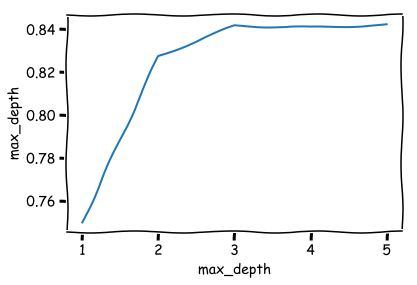

In [161]:
plt.xlabel("max_depth")
plt.ylabel("max_depth")
plt.plot(max_depth_range,accuracy)

In [162]:
from sklearn.metrics import accuracy_score

dtreemodel = DecisionTreeClassifier(max_depth=10)

dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions)}")

0.8551432291666666


Prediction accuracy score of 85.5%

In [163]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [164]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

4351 256 634 903
[903, 256]
[634, 4351]


In [165]:
print('Classifier Confusion matrix :','\n',confusion_matrix(y_test,predictions))
print('Classifier evaluation index :','\n',classification_report(y_test,predictions))

print()

Classifier Confusion matrix : 
 [[4351  256]
 [ 634  903]]
Classifier evaluation index : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4607
           1       0.78      0.59      0.67      1537

    accuracy                           0.86      6144
   macro avg       0.83      0.77      0.79      6144
weighted avg       0.85      0.86      0.85      6144




The model has a good accuracy on low income levels with only 7%
of the values incorrectly identified as high income level but the
performance is low on higher income levels with 23% of individuals
with higher income predicted to have lower income. The accuracy of the model is 86%. This should be seen in perspective since the model is not good in predicting higher income levels.

### Evaluation - RF

In [166]:
print(accuracy_score(y_test, y_pred_rf))

0.8427734375


Accuracy score of 84.2%

### Evaluation - kNN

In [167]:
scores

{1: 0.8177083333333334,
 2: 0.83349609375,
 3: 0.826171875,
 4: 0.8396809895833334,
 5: 0.8356119791666666,
 6: 0.8460286458333334,
 7: 0.8411458333333334,
 8: 0.8434244791666666,
 9: 0.8409830729166666,
 10: 0.8430989583333334,
 11: 0.8458658854166666,
 12: 0.8458658854166666,
 13: 0.8465169270833334,
 14: 0.8494466145833334,
 15: 0.8458658854166666,
 16: 0.845703125,
 17: 0.8473307291666666,
 18: 0.8419596354166666,
 19: 0.8430989583333334,
 20: 0.84521484375,
 21: 0.8450520833333334,
 22: 0.8439127604166666,
 23: 0.8455403645833334,
 24: 0.84423828125,
 25: 0.8427734375,
 26: 0.84326171875,
 27: 0.8408203125,
 28: 0.8419596354166666,
 29: 0.8408203125}

Text(0, 0.5, 'Testing Accuracy')

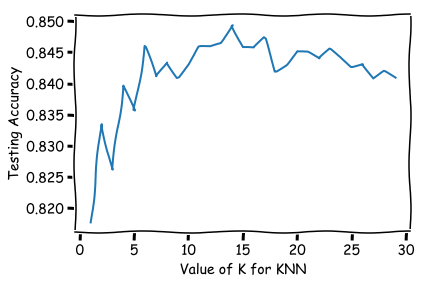

In [168]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### K values with 14 has an accuracy of 84.7%

### Evaluation - AdaBoost

In [170]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [171]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8585611979166666


Accuracy score of 86.0%

### Conclusion

### Fin